In [1]:
import pandas as pd
import numpy as np

#pd.set_option('display.max_rows',500)



![CRISP_DM](../reports/figures/CRISP_DM.png)

# Data Understanding

* key focus is to understand the data structure

* supporting each step by visual analytics

# John Hopkins data

In [2]:
data_path = ('../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
pd_raw = pd.read_csv(data_path)

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,989,989,989,1005,1005,1024,1024,1045,1045,1045
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171


In [4]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '8/14/20', '8/15/20', '8/16/20', '8/17/20', '8/18/20', '8/19/20',
       '8/20/20', '8/21/20', '8/22/20', '8/23/20'],
      dtype='object', length=215)

In [5]:
time_idx = pd_raw.columns[4:]

In [6]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [7]:
pd_raw['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [8]:
pd_raw['Country/Region']

0                 Afghanistan
1                     Albania
2                     Algeria
3                     Andorra
4                      Angola
5         Antigua and Barbuda
6                   Argentina
7                     Armenia
8                   Australia
9                   Australia
10                  Australia
11                  Australia
12                  Australia
13                  Australia
14                  Australia
15                  Australia
16                    Austria
17                 Azerbaijan
18                    Bahamas
19                    Bahrain
20                 Bangladesh
21                   Barbados
22                    Belarus
23                    Belgium
24                     Belize
25                      Benin
26                     Bhutan
27                    Bolivia
28     Bosnia and Herzegovina
29                   Botswana
                ...          
236                  Thailand
237               Timor-Leste
238       

In [9]:
pd_raw[pd_raw['Country/Region']=='United Kingdom']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20
246,Anguilla,United Kingdom,18.220600,-63.068600,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
247,Bermuda,United Kingdom,32.307800,-64.750500,0,0,0,0,0,0,...,159,162,162,166,166,166,166,167,167,167
248,British Virgin Islands,United Kingdom,18.420700,-64.640000,0,0,0,0,0,0,...,9,9,9,9,11,11,11,21,21,21
249,Cayman Islands,United Kingdom,19.313300,-81.254600,0,0,0,0,0,0,...,203,203,203,203,203,205,205,205,205,205
250,Channel Islands,United Kingdom,49.372300,-2.364400,0,0,0,0,0,0,...,607,607,607,609,609,613,613,614,614,614
251,Falkland Islands (Malvinas),United Kingdom,-51.796300,-59.523600,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
252,Gibraltar,United Kingdom,36.140800,-5.353600,0,0,0,0,0,0,...,206,209,215,217,222,223,229,231,239,246
253,Isle of Man,United Kingdom,54.236100,-4.548100,0,0,0,0,0,0,...,336,336,336,336,336,336,336,336,336,336
254,Montserrat,United Kingdom,16.742498,-62.187366,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
255,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,274,298,298,298,315,327,334,347,383,383


In [10]:
pd_raw[pd_raw['Country/Region']=='United Kingdom'].iloc[:,4::]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20
246,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
247,0,0,0,0,0,0,0,0,0,0,...,159,162,162,166,166,166,166,167,167,167
248,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,11,11,11,21,21,21
249,0,0,0,0,0,0,0,0,0,0,...,203,203,203,203,203,205,205,205,205,205
250,0,0,0,0,0,0,0,0,0,0,...,607,607,607,609,609,613,613,614,614,614
251,0,0,0,0,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
252,0,0,0,0,0,0,0,0,0,0,...,206,209,215,217,222,223,229,231,239,246
253,0,0,0,0,0,0,0,0,0,0,...,336,336,336,336,336,336,336,336,336,336
254,0,0,0,0,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
255,0,0,0,0,0,0,0,0,0,0,...,274,298,298,298,315,327,334,347,383,383


In [11]:
pd_raw[pd_raw['Country/Region']=='United Kingdom'].iloc[:,4::].sum(axis=0)

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
1/27/20         0
1/28/20         0
1/29/20         0
1/30/20         0
1/31/20         2
2/1/20          2
2/2/20          2
2/3/20          8
2/4/20          8
2/5/20          9
2/6/20          9
2/7/20          9
2/8/20         13
2/9/20         14
2/10/20        14
2/11/20        15
2/12/20        16
2/13/20        17
2/14/20        18
2/15/20        18
2/16/20        18
2/17/20        19
2/18/20        19
2/19/20        20
2/20/20        22
            ...  
7/25/20    300270
7/26/20    301020
7/27/20    301708
7/28/20    302261
7/29/20    303063
7/30/20    303910
7/31/20    304793
8/1/20     305562
8/2/20     306309
8/3/20     307251
8/4/20     307926
8/5/20     308832
8/6/20     309796
8/7/20     310696
8/8/20     311461
8/9/20     312574
8/10/20    313392
8/11/20    314542
8/12/20    315581
8/13/20    316729
8/14/20    318190
8/15/20    319232
8/16/20    320343
8/17/20    321064
8/18/20   

In [12]:
country_list = ['Italy',
                'India',
                'Germany',
                'US',
                'Spain']

In [13]:
for each in country_list:
    df_plot[each] =np.array(pd_raw[pd_raw['Country/Region']== each].iloc[:,4::].sum(axis=0))

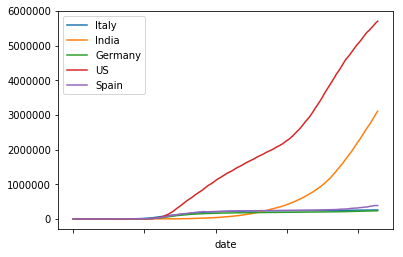

In [14]:
%matplotlib inline
df_plot.set_index('date').plot()

 ## Data Type date

In [15]:
from datetime import datetime

In [16]:
df_plot.date[0]

'1/22/20'

In [17]:
datetime.strptime(df_plot.date[0],'%m/%d/%y')

datetime.datetime(2020, 1, 22, 0, 0)

In [18]:
time_idx = [datetime.strptime(each,'%m/%d/%y') for each in df_plot.date]  # convert to date time

In [19]:
time_idx[0:5]


[datetime.datetime(2020, 1, 22, 0, 0),
 datetime.datetime(2020, 1, 23, 0, 0),
 datetime.datetime(2020, 1, 24, 0, 0),
 datetime.datetime(2020, 1, 25, 0, 0),
 datetime.datetime(2020, 1, 26, 0, 0)]

In [20]:
time_str = [each.strftime('%Y-%m-%d')for each in time_idx]
time_str[0:5]

['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26']

### After Cleanup

In [21]:
df_plot.head()

,date,Italy,India,Germany,US,Spain
0,1/22/20,0,0,0,1,0
1,1/23/20,0,0,0,1,0
2,1/24/20,0,0,0,2,0
3,1/25/20,0,0,0,2,0
4,1/26/20,0,0,0,5,0


In [22]:
time_idx = [datetime.strptime(each,'%m/%d/%y') for each in df_plot.date]  # convert to date time
time_str = [each.strftime('%Y-%m-%d')for each in time_idx]  # converting back to ISo form as a string

In [23]:
df_plot['date']= time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [24]:
df_plot.head()

,date,Italy,India,Germany,US,Spain
0,2020-01-22,0,0,0,1,0
1,2020-01-23,0,0,0,1,0
2,2020-01-24,0,0,0,2,0
3,2020-01-25,0,0,0,2,0
4,2020-01-26,0,0,0,5,0


In [25]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';', index=False)

### Relational data model - defines a primary key

In [26]:
data_path = ('../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
pd_raw = pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,989,989,989,1005,1005,1024,1024,1045,1045,1045
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171


In [27]:
## split transcational data(date in this exercise) and master data(lat and long information of countries)

In [28]:
pd_data_base=pd_raw.rename(columns = {'Country/Region': 'country',
                                      'Province/State' : 'state'}) # rename the columns in the data base

In [29]:
pd_data_base =pd_data_base.drop(['Lat','Long'],axis=1)    # removing the lat and longitude in the data base
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999
1,NaN,Albania,0,0,0,0,0,0,0,0,...,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,989,989,989,1005,1005,1024,1024,1045,1045,1045
4,NaN,Angola,0,0,0,0,0,0,0,0,...,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171


In [30]:
pd_data_base.set_index(['state','country'])   # setting index only to state and country column

1/22/20  1/23/20  \
state                        country                                    
NaN                          Afghanistan                   0        0   
                             Albania                       0        0   
                             Algeria                       0        0   
                             Andorra                       0        0   
                             Angola                        0        0   
                             Antigua and Barbuda           0        0   
                             Argentina                     0        0   
                             Armenia                       0        0   
Australian Capital Territory Australia                     0        0   
New South Wales              Australia                     0        0   
Northern Territory           Australia                     0        0   
Queensland                   Australia                     0        0   
South Australia              Australia                     0        0   
Tasmania                     Australia                     0        0   
Victoria                     Australia                     0        0   
Western Australia            Australia                     0        0   
NaN                          Austria                       0        0   
                             Azerbaijan                    0        0   
                             Bahamas                       0        0   
                             Bahrain                       0        0   
                             Bangladesh                    0        0   
                             Barbados                      0        0   
                             Belarus                       0        0   
                             Belgium                       0        0   
                             Belize                        0        0   
                             Benin                         0        0   
                             Bhutan                        0        0   
                             Bolivia                       0        0   
                             Bosnia and Herzegovina        0        0   
                             Botswana                      0        0   
...                                                      ...      ...   
                             Thailand                      2        3   
                             Timor-Leste                   0        0   
                             Togo                          0        0   
                             Trinidad and Tobago           0        0   
                             Tunisia                       0        0   
                             Turkey                        0        0   
                             US                            1        1   
                             Uganda                        0        0   
                             Ukraine                       0        0   
                             United Arab Emirates          0        0   
Anguilla                     United Kingdom                0        0   
Bermuda                      United Kingdom                0        0   
British Virgin Islands       United Kingdom                0        0   
Cayman Islands               United Kingdom                0        0   
Channel Islands              United Kingdom                0        0   
Falkland Islands (Malvinas)  United Kingdom                0        0   
Gibraltar                    United Kingdom                0        0   
Isle of Man                  United Kingdom                0        0   
Montserrat                   United Kingdom                0        0   
Turks and Caicos Islands     United Kingdom                0        0   
NaN                          United Kingdom                0        0   
                             Uruguay                       0        0   
                             Uzbekista

In [31]:
test_pd = pd_data_base.set_index(['state','country']).T     # transpose the matrix

In [32]:
test_pd.columns

MultiIndex(levels=[['Alberta', 'Anguilla', 'Anhui', 'Aruba', 'Australian Capital Territory', 'Beijing', 'Bermuda', 'Bonaire, Sint Eustatius and Saba', 'British Columbia', 'British Virgin Islands', 'Cayman Islands', 'Channel Islands', 'Chongqing', 'Curacao', 'Diamond Princess', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'French Guiana', 'French Polynesia', 'Fujian', 'Gansu', 'Gibraltar', 'Grand Princess', 'Greenland', 'Guadeloupe', 'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Isle of Man', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Manitoba', 'Martinique', 'Mayotte', 'Montserrat', 'New Brunswick', 'New Caledonia', 'New South Wales', 'Newfoundland and Labrador', 'Ningxia', 'Northern Territory', 'Northwest Territories', 'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Qinghai', 'Quebec', 'Queensland', 'Reunion', 'Saint Barthelemy', 'Saint Pierre and Miquelon', 'Saskatchewan', 'Shaanxi', 'S

In [33]:
retest_pd = test_pd.stack(level = [0,1]).reset_index()

In [34]:
retest_pd.rename(columns = {'level_0': 'date',
                                      0 : 'confirmed'})

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0
5,1/22/20,NaN,Antigua and Barbuda,0.0
6,1/22/20,NaN,Argentina,0.0
7,1/22/20,NaN,Armenia,0.0
8,1/22/20,NaN,Austria,0.0
9,1/22/20,NaN,Azerbaijan,0.0


In [35]:
retest_pd.to_csv ('../data/processed/COVID_relational_confirmed.csv',sep=';')

# Groupby apply